# Additional methods

This notebooks provides an overview of built-in clustering performance evaluation, ways of accessing individual labels resulting from clustering and saving the object to disk.

## Clustering performance evaluation

Clustergam includes handy wrappers around a selection of clustering performance metrics offered by
`scikit-learn`. Data which were originally computed on GPU are converted to numpy on the fly.

Let's load the data and fit clustergram on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [12]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

seaborn.set(style='whitegrid')

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

cgram = Clustergram(range(1, 12), verbose=False)
cgram.fit(data)

### Silhouette score

Compute the mean Silhouette Coefficient of all samples. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) for details. 

In [14]:
cgram.silhouette_score()

2     0.531540
3     0.447219
4     0.400154
5     0.377720
6     0.372722
7     0.334723
8     0.300173
9     0.289008
10    0.283982
11    0.275596
Name: silhouette_score, dtype: float64

Once computed, resulting Series is available as `cgram.silhouette`. Calling the original method will recompute the score.

<AxesSubplot:>

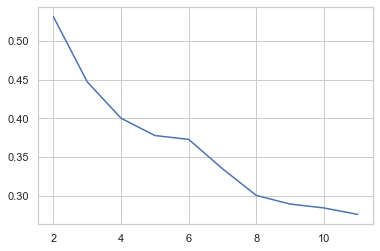

In [15]:
cgram.silhouette.plot()

### Calinski and Harabasz score

Compute the Calinski and Harabasz score, also known as the Variance Ratio Criterion. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) for details.

In [4]:
cgram.calinski_harabasz_score()

2     482.191469
3     441.677075
4     400.410025
5     411.258719
6     382.291616
7     352.464103
8     334.070064
9     315.539143
10    300.957431
11    287.590520
Name: calinski_harabasz_score, dtype: float64

Once computed, resulting Series is available as `cgram.calinski_harabasz`. Calling the original method will recompute the score.

<AxesSubplot:>

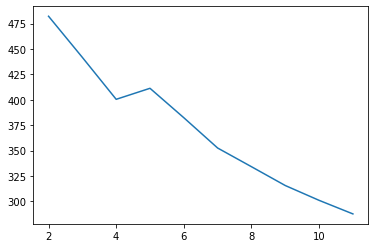

In [5]:
cgram.calinski_harabasz.plot()

### Davies-Bouldin score

Compute the Davies-Bouldin score. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score) for details.

In [6]:
cgram.davies_bouldin_score()

2     0.714064
3     0.943553
4     0.944215
5     0.972408
6     0.948556
7     1.075790
8     1.138705
9     1.233587
10    1.202486
11    1.221233
Name: davies_bouldin_score, dtype: float64

Once computed, resulting Series is available as `cgram.davies_bouldin`. Calling the original method will recompute the score.

<AxesSubplot:>

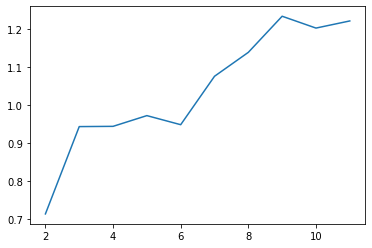

In [8]:
cgram.davies_bouldin.plot()

## Acessing labels

`Clustergram` stores resulting labels for each of the tested options, which can be accessed as:

In [9]:
cgram.labels

,1,2,3,4,5,6,7,8,9,10,11
0,0,1,1,1,3,4,4,6,7,5,9
1,0,1,1,1,3,4,4,0,7,1,3
2,0,1,1,1,3,4,4,0,7,1,3
3,0,1,1,1,3,4,4,6,0,5,9
4,0,1,1,1,2,5,0,6,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...
337,0,0,0,3,4,3,6,3,1,4,5
338,0,0,0,3,4,3,6,3,1,4,5
339,0,0,0,0,1,1,3,7,5,7,7
340,0,0,0,3,4,3,1,1,8,0,1


## Saving clustergram

If you want to save your computed `clustergram.Clustergram` object to a disk, you can use `pickle` library:

In [10]:
import pickle

with open('clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)

In [11]:
with open('clustergram.pickle','rb') as f:
    loaded = pickle.load(f)